# Introduction

---

Ung thư phổi là một thách thức sức khỏe toàn cầu ghê gớm, đặc trưng bởi sự phát triển của các khối u ác tính trong các mô phổi. Đây là một vấn đề đáng quan tâm do mức độ nghiêm trọng và phổ biến toàn cầu của nó. Ung thư phổi là nguyên nhân hàng đầu gây tử vong liên quan đến ung thư trên toàn thế giới, ảnh hưởng đến các cá nhân thuộc nhiều nhóm nhân khẩu học khác nhau. Mức độ nghiêm trọng của ung thư phổi bắt nguồn từ tính chất hung hãn của nó và những thách thức liên quan đến chẩn đoán và điều trị.


# About datasets

---
Gender Influence: Giới tính ảnh hưởng đến khả năng phát triển ung thư phổi ở mức độ nào và có sự chênh lệch đáng chú ý về giới tính không?

Age-Related Risk: Yếu tố tuổi tác ảnh hưởng đến nguy cơ ung thư phổi như thế nào và có nhóm tuổi cụ thể nào dễ bị tổn thương hơn không?

Smoking History: Tiền sử hút thuốc liên quan đến nguy cơ ung thư phổi như thế nào và có mối liên hệ đơn giản nào không?

Yellow Fingers: Sự hiện diện của ngón tay vàng, có thể do nhuộm nicotin, có liên quan đến nguy cơ ung thư phổi cao không?

Anxiety Impact: Có mối liên hệ nào giữa mức độ lo lắng và khả năng phát triển ung thư phổi không?

Peer Pressure Influence: Việc tiếp xúc với áp lực ngang hàng, đặc biệt liên quan đến hút thuốc, ảnh hưởng đến nguy cơ ung thư phổi như thế nào?

Chronic Diseases: Những người mắc bệnh mãn tính có nguy cơ mắc ung thư phổi cao hơn không?

Fatigue and Risk: Mệt mỏi mãn tính hoặc mệt mỏi có đóng vai trò trong nguy cơ ung thư phổi không?

Allergies and Susceptibility: Có mối tương quan giữa dị ứng và tăng nguy cơ ung thư phổi không?

Wheezing Connection: Mối liên hệ giữa thở khò khè và khả năng phát triển ung thư phổi mạnh đến mức nào?

Alcohol Impact: Việc tiêu thụ rượu có ảnh hưởng đến nguy cơ ung thư phổi không?

Coughing and Risk: Có mối liên hệ đáng kể nào giữa ho mãn tính và nguy cơ ung thư phổi không?

Respiratory and Swallowing Factors: "Các triệu chứng như khó thở và khó nuốt có liên quan như thế nào đến nguy cơ ung thư phổi?"

Assessing Chest Pain: Đau ngực liên quan thế nào đến nguy cơ phát triển ung thư phổi?


# Data Preprocessing

In [ ]:
import numpy as np, pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import (accuracy_score,
                             auc,
                             precision_score,
                             recall_score,
                             f1_score,
                             roc_auc_score,
                             confusion_matrix)
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import (RandomForestClassifier,
                              AdaBoostClassifier,
                              GradientBoostingClassifier)

In [ ]:
link='https://drive.google.com/file/d/1YoPeh5Pka4pvcZxLJMnxZye39jMCecIt/view?usp=sharing'
#Đọc data
path = 'https://drive.google.com/uc?export=download&id='+link.split('/')[-2]
df = pd.read_csv(path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


GIỚI TÍNH: Giới tính của cá nhân, nam hay nữ (M/F)

TUỔI: Tuổi của người đó tính bằng năm

HÚT THUỐC: Chỉ báo nhị phân về lịch sử hút thuốc

NGÓN TAY VÀNG: Xuất hiện hiện tượng vàng ngón tay

LO LẮNG: Sự hiện diện của các vấn đề lo âu

PEER_PRESSURE: Chịu áp lực từ bạn bè

BỆNH MẠN TÍNH: Sự hiện diện của các bệnh mãn tính

MỆT MỎI: Xuất hiện tình trạng mệt mỏi hoặc kiệt sức mãn tính

DỊ ỨNG: Có dị ứng

KHUYẾN CÁO: Xuất hiện tình trạng thở khò khè

RƯỢU: Tiêu thụ rượu

HO: Xuất hiện tình trạng ho mãn tính

KHÓ HƠI: Cảm giác khó thở

KHÓ KHĂN NUỐT: Khó nuốt

ĐAU NGỰC: Có đau ngực

LUNG_CANCER: Có bị ung thư phổi hay không


In [ ]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ', '_')

In [ ]:
columns_to_replace = ['smoking', 'yellow_fingers', 'anxiety', 'peer_pressure', 'chronic_disease', 'fatigue',
                       'allergy', 'wheezing', 'alcohol_consuming', 'coughing', 'shortness_of_breath', 'swallowing_difficulty',
                       'chest_pain', 'lung_cancer']
replacement_mapping = {1: 0, 2: 1}
df[columns_to_replace] = df[columns_to_replace].replace(replacement_mapping)
df['lung_cancer'] = df['lung_cancer'].replace({"YES":1,"NO":0})


In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
df.shape

(276, 16)

In [ ]:
df.isnull().sum()

gender                   0
age                      0
smoking                  0
yellow_fingers           0
anxiety                  0
peer_pressure            0
chronic_disease          0
fatigue                  0
allergy                  0
wheezing                 0
alcohol_consuming        0
coughing                 0
shortness_of_breath      0
swallowing_difficulty    0
chest_pain               0
lung_cancer              0
dtype: int64

In [ ]:
df['gender'] = df['gender'].replace({"M":0,"F":1})

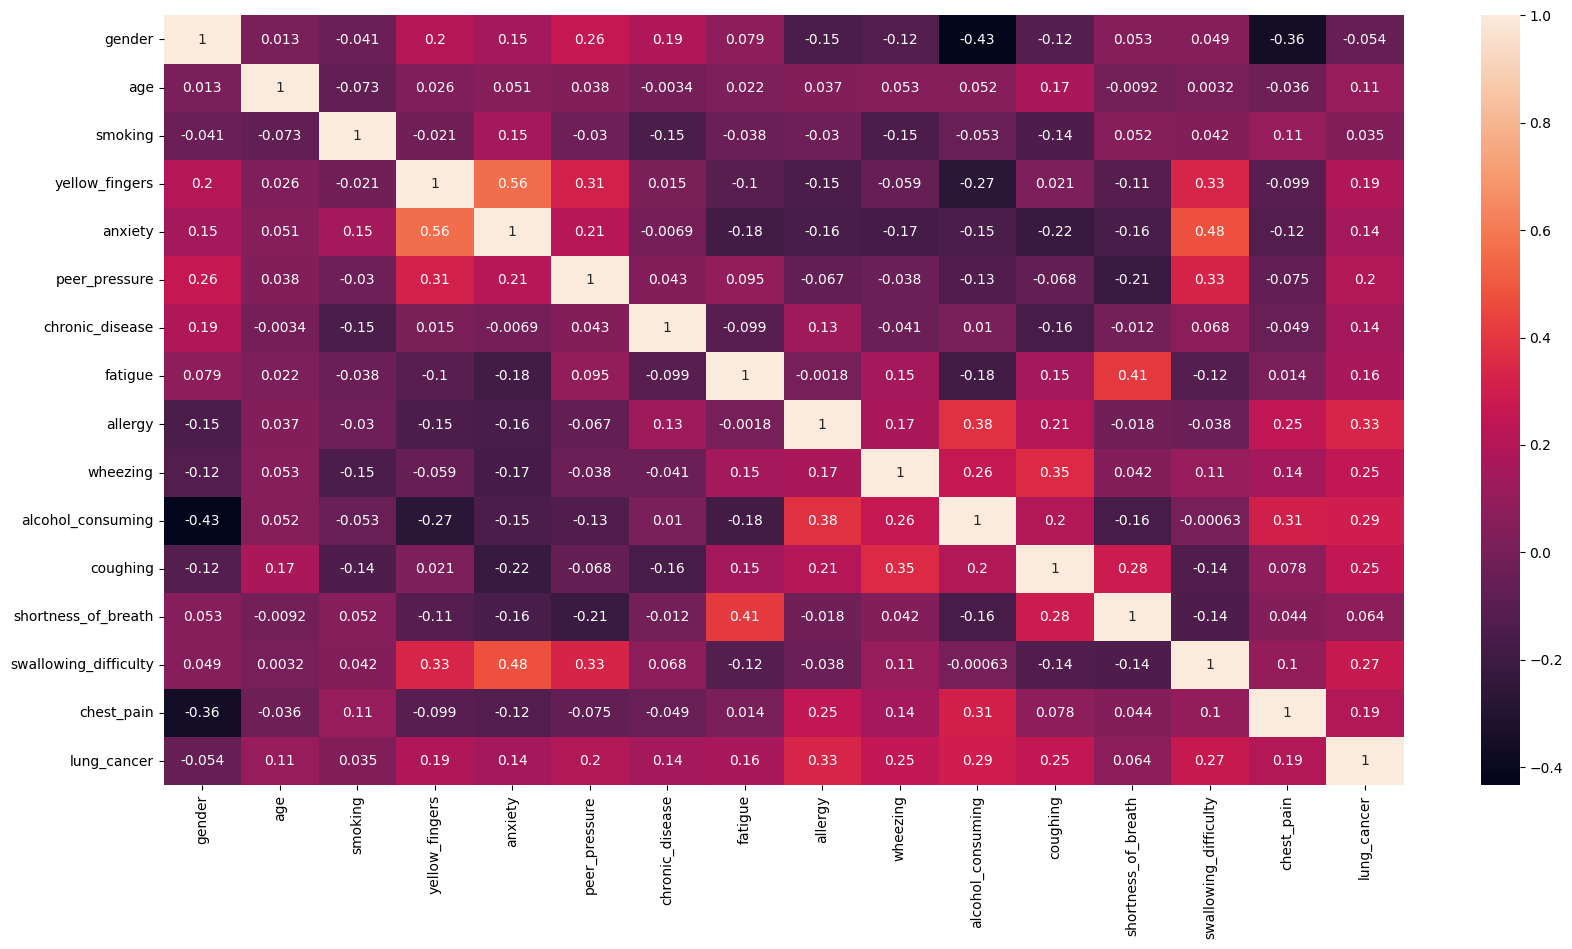

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True);

#

In [ ]:
df_plot = df.copy()
df_plot['lung_cancer'] = df_plot['lung_cancer'].replace({0: 'No', 1: 'Yes'})
fig = px.histogram(df_plot, x='lung_cancer', color='lung_cancer',
                   color_discrete_map={'No': '#a3a3ec', 'Yes': '#ff9f9f'},
                   labels={'lung_cancer': 'Lung Cancer'},
                   title='Distribution of Lung Cancer')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
total_counts = df_plot['lung_cancer'].count()
for i in range(2):
    count = df_plot[df_plot['lung_cancer'] == ['Yes', 'No'][i]]['lung_cancer'].count()
    percentage = count / total_counts * 100
    fig.add_annotation(
        x=['Yes', 'No'][i], y=count + 15,
        text=f'{percentage:.2f}%',
        showarrow=False,
        font=dict(family='sarif',size=12, color='black')
    )
fig.show()

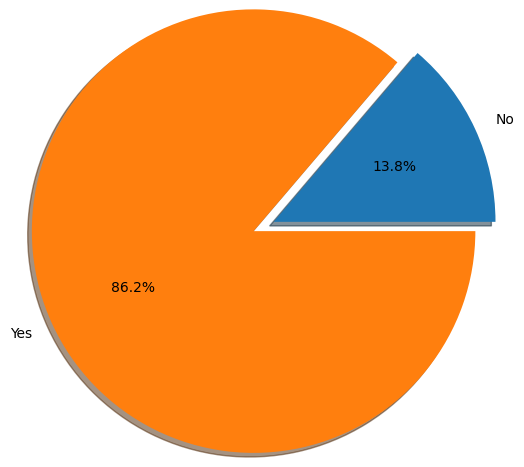

In [ ]:
r = df.groupby('lung_cancer')['lung_cancer'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['No', 'Yes'], radius=1.5, autopct='%1.1f%%',  shadow=True);

Trong tập dữ liệu của mình kiểm tra sự phân bố của bệnh ung thư phổi giữa các cá nhân.Chúng ta có thể thấy từ biểu đồ là phần lớn chiếm khoảng 86,23% số người mắc bệnh ung thư phổi. Điều này có nghĩa là cứ 100 cá nhân thì có khoảng 86 người là bị ảnh hưởng từ tình trạng này. Ngược lại, chỉ có khoảng 13,77% số người trong tập dữ liệu này không bị ung thư phổi. Sự khác biệt rõ rệt này nhấn mạnh tính chất mất cân bằng của tập dữ liệu.

In [ ]:
X_cat = df.drop(['age'], axis=1)

In [ ]:
def draw_countplots(data, n_rows, n_cols):
    columns = data.columns
    n_plots = len(columns)


    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)


    for i, col in enumerate(columns):
        row = i // n_cols
        col_idx = i % n_cols
        sns.countplot(data = data ,x=data[col], ax=axes[row, col_idx], hue='lung_cancer')
        axes[row, col_idx].set_title(col)

    for remaining in range(i + 1, n_rows * n_cols):
        row = remaining // n_cols
        col_idx = remaining % n_cols
        fig.delaxes(axes[row, col_idx])
    fig.suptitle("Histplots of all category columns")
    plt.show()

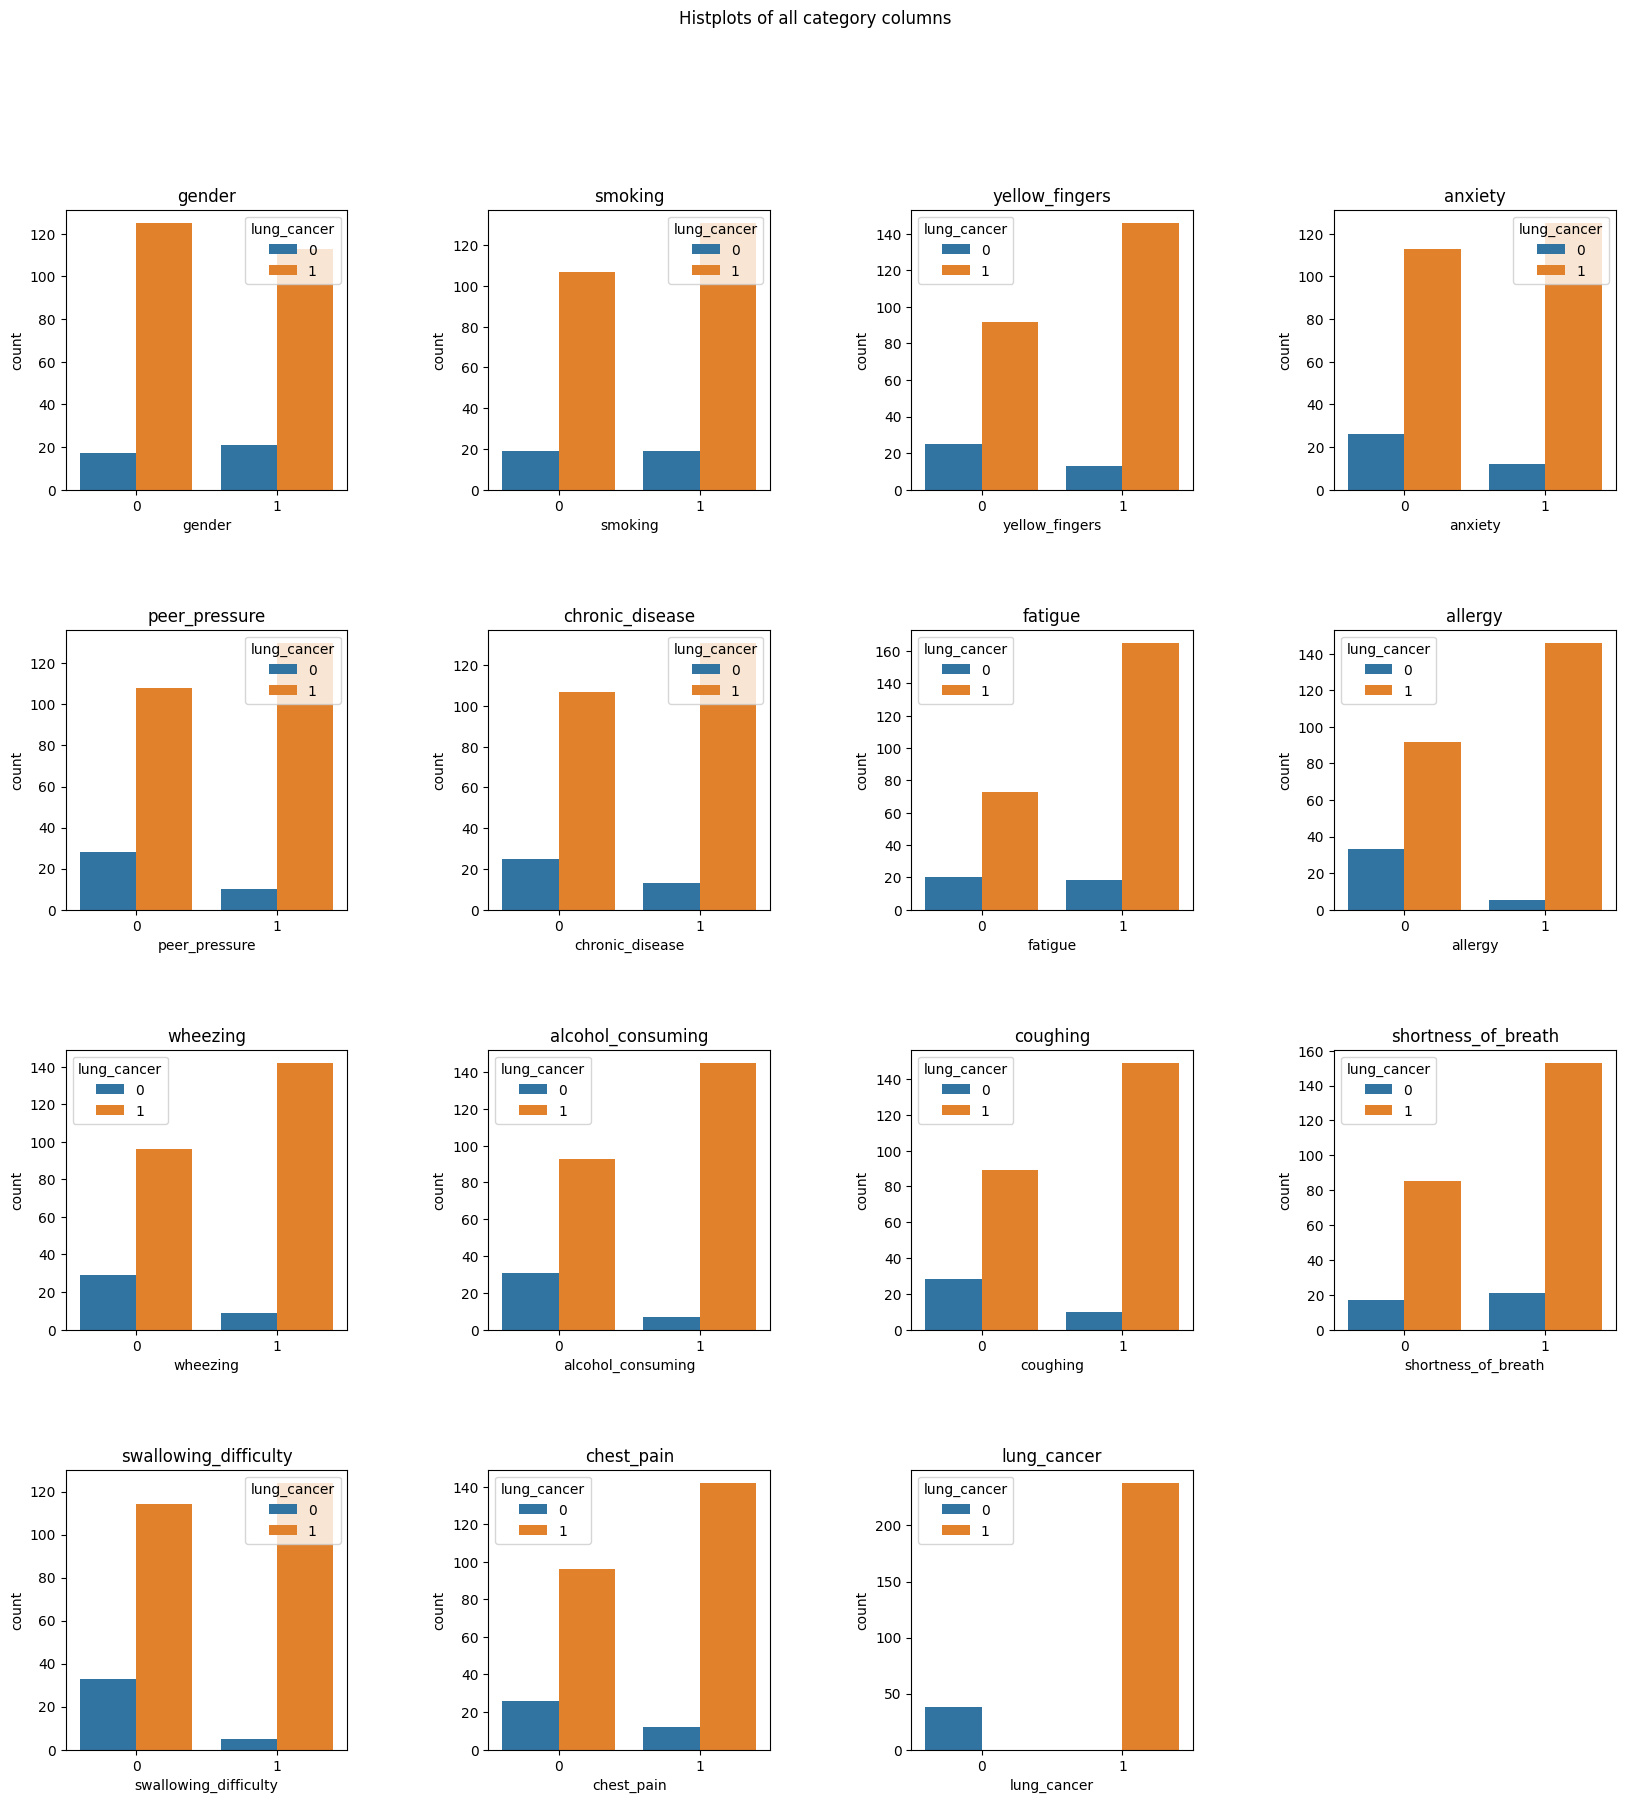

In [ ]:
draw_countplots(X_cat, 4, 4)

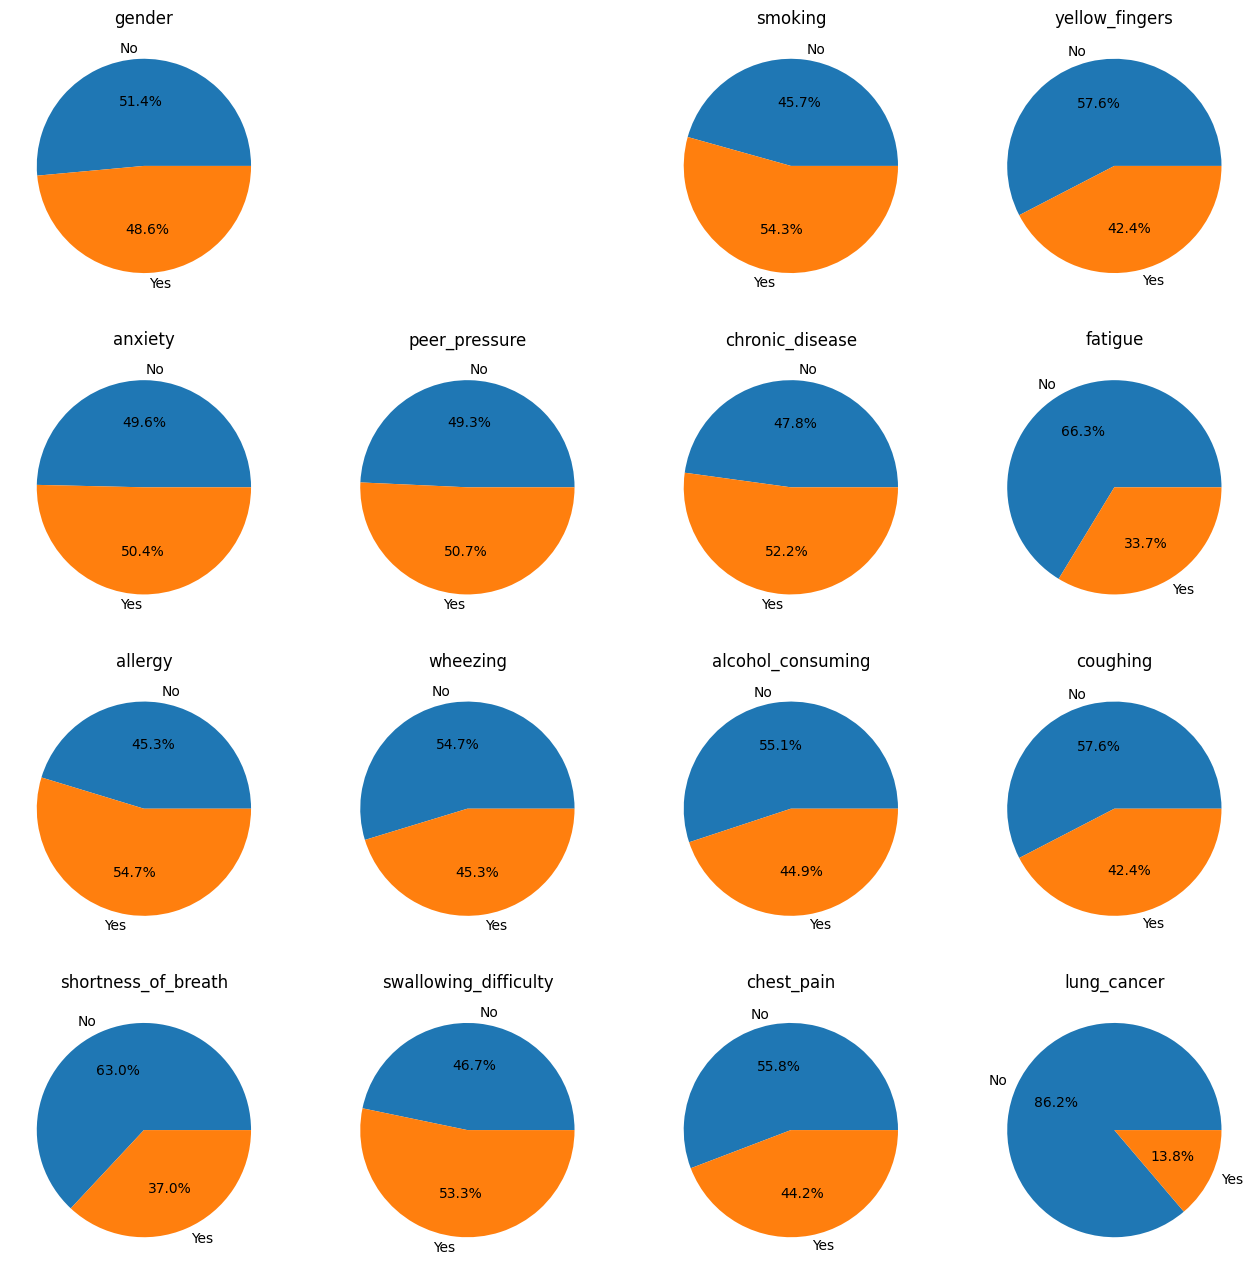

In [ ]:
plt.figure(figsize=(16,16))
for i in range(0,len(df.columns)):
    if i==1:
        continue
    else:
        plt.subplot(4,4,i+1)
        plt.title("{0}".format(df.columns[i]))
        plt.pie(df.iloc[:,i].value_counts(sort=False),labels=['No','Yes'],autopct='%.1f%%')

<Figure size 640x480 with 0 Axes>

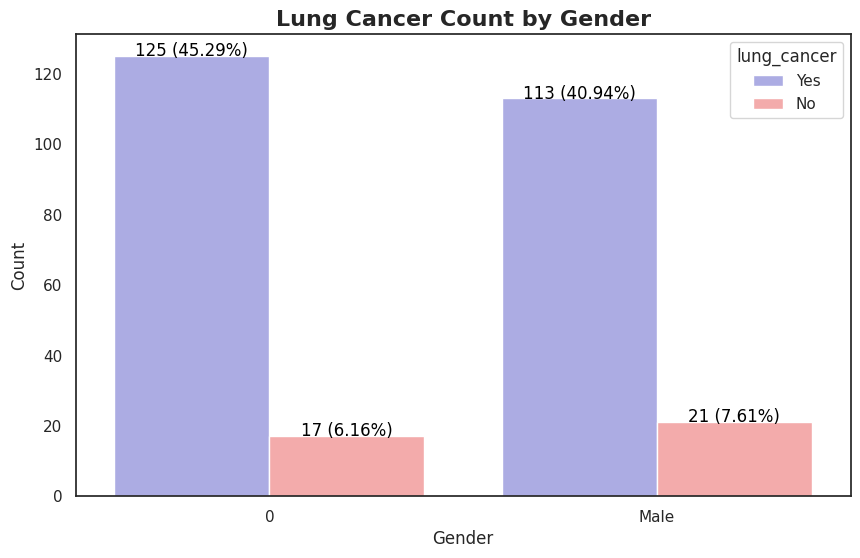

In [ ]:
df_plot = df.copy()
df_plot['gender'] = df_plot['gender'].replace({1:"Male",2:"Female"})
df_plot['lung_cancer'] = df_plot['lung_cancer'].replace({0:"No",1:"Yes"})
sns.set(style="whitegrid")
sns.set_style("white")
sns.despine()
palette = [ '#a3a3ec','#ff9f9f']
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df_plot, x='gender', hue='lung_cancer', palette=palette)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Lung Cancer Count by Gender", fontsize=16, fontweight='bold')

total_counts = len(df)

for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total_counts:.2f}%"
    ax.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black')

plt.show()

In [ ]:
# People who smoke and have lung cancer
sm1 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 1)]

# People who smoke and don't have lung cancer
sm2 = df[(df['smoking'] == 1) & (df['lung_cancer'] == 0)]

# People who don't smoke and have lung cancer
sm3 = df[(df['smoking'] == 0) & (df['lung_cancer'] == 1)]

# People who don't smoke and don't have lung cancer
sm4 = df[(df['smoking'] == 0) & (df['lung_cancer'] == 0)]

sm1_percentage = round((len(sm1) / len(df[df['smoking'] == 1])) * 100,2)
sm2_percentage = round((len(sm2) / len(df[df['smoking'] == 1])) * 100,2)
sm3_percentage = round((len(sm3) / len(df[df['smoking'] == 0])) * 100,2)
sm4_percentage = round((len(sm4) / len(df[df['smoking'] == 0])) * 100,2)

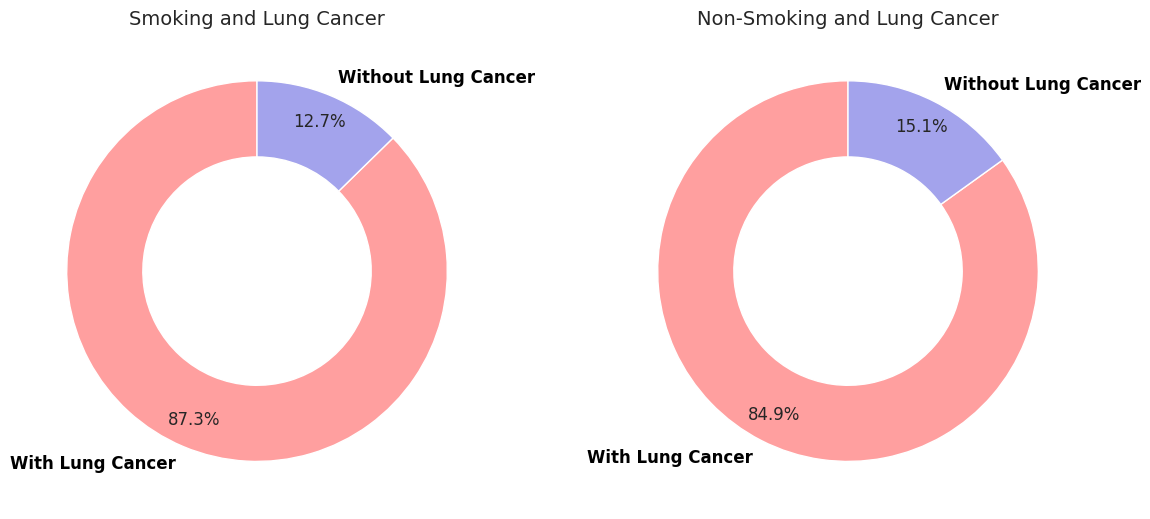

In [ ]:
percentages1 = [sm1_percentage, sm2_percentage]
percentages2 = [sm3_percentage, sm4_percentage]
labels1 = ['With Lung Cancer', 'Without Lung Cancer']
labels2 = ['With Lung Cancer', 'Without Lung Cancer']
colors = ['#ff9f9f', '#a3a3ec']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedges1, text1, autotext1 = axes[0].pie(
    percentages1, labels=labels1, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle1 = plt.Circle((0, 0), 0.3, fc='white')
axes[0].add_artist(center_circle1)
axes[0].set_title('Smoking and Lung Cancer', fontsize=14)
for t in text1:
    t.set(color='black', fontsize=12, fontweight='bold')
wedges2, text2, autotext2 = axes[1].pie(
    percentages2, labels=labels2, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle2 = plt.Circle((0, 0), 0.3, fc='white')
axes[1].add_artist(center_circle2)
axes[1].set_title('Non-Smoking and Lung Cancer', fontsize=14)
for t in text2:
    t.set(color='black', fontsize=12, fontweight='bold')
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
plt.tight_layout()
plt.show()

In [ ]:
# People who consume alcohol and have lung cancer
alc1 = df[(df['alcohol_consuming'] == 1) & (df['lung_cancer'] == 1)]

# People who consume alcohol and don't have lung cancer
alc2 = df[(df['alcohol_consuming'] == 1) & (df['lung_cancer'] == 0)]

# People who don't consume alcohol and have lung cancer
alc3 = df[(df['alcohol_consuming'] == 0) & (df['lung_cancer'] == 1)]

# People who don't consume alcohol and don't have lung cancer
alc4 = df[(df['alcohol_consuming'] == 0) & (df['lung_cancer'] == 0)]

alc1_percentage = round((len(alc1) / len(df[df['alcohol_consuming'] == 1])) * 100,2)
alc2_percentage = round((len(alc2) / len(df[df['alcohol_consuming'] == 1])) * 100,2)
alc3_percentage = round((len(alc3) / len(df[df['alcohol_consuming'] == 0])) * 100,2)
alc4_percentage = round((len(alc4) / len(df[df['alcohol_consuming'] == 0])) * 100,2)

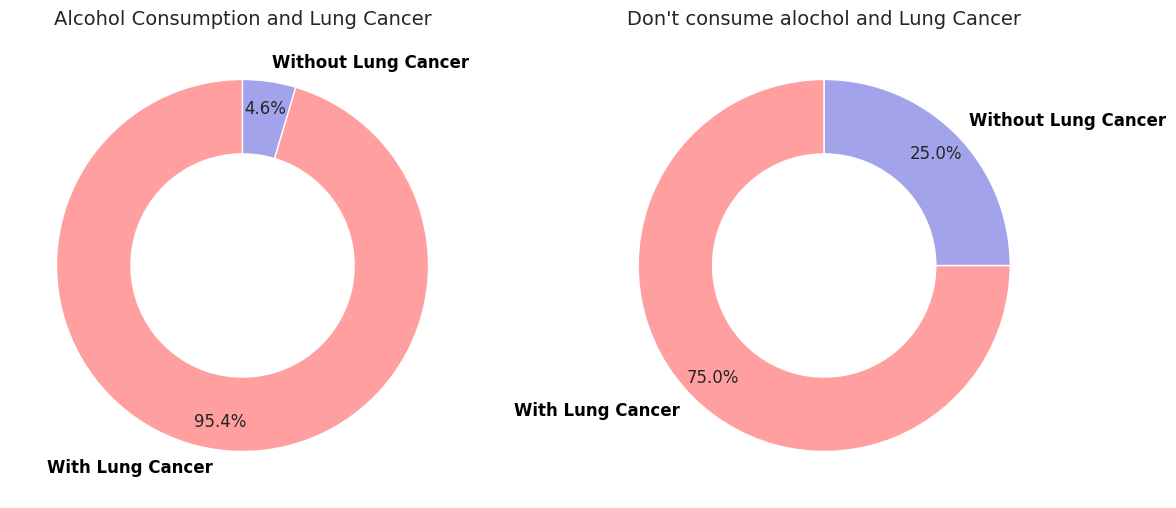

In [ ]:
percentages1 = [alc1_percentage, alc2_percentage]
percentages2 = [alc3_percentage, alc4_percentage]
labels1 = ['With Lung Cancer', 'Without Lung Cancer']
labels2 = ['With Lung Cancer', 'Without Lung Cancer']
colors = ['#ff9f9f', '#a3a3ec']
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
wedges1, text1, autotext1 = axes[0].pie(
    percentages1, labels=labels1, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle1 = plt.Circle((0, 0), 0.3, fc='white')
axes[0].add_artist(center_circle1)
axes[0].set_title('Alcohol Consumption and Lung Cancer', fontsize=14)
for t in text1:
    t.set(color='black', fontsize=12, fontweight='bold')
wedges2, text2, autotext2 = axes[1].pie(
    percentages2, labels=labels2, autopct='%1.1f%%',
    startangle=90, pctdistance=0.85, colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)
center_circle2 = plt.Circle((0, 0), 0.3, fc='white')
axes[1].add_artist(center_circle2)
axes[1].set_title("Don't consume alochol and Lung Cancer", fontsize=14)
for t in text2:
    t.set(color='black', fontsize=12, fontweight='bold')
axes[0].set_aspect('equal')
axes[1].set_aspect('equal')
plt.tight_layout()
plt.show()

In [ ]:
df_copy = df.copy()
df_copy['chest_pain'] = df_copy['chest_pain'].replace({0: 'No', 1: 'Yes'})
fig = px.histogram(df_copy, x='chest_pain', color='chest_pain',
                   color_discrete_map={'Yes': '#f59542', 'No': '#f4e78b'},
                   labels={'chest_pain': 'Chest pain'},
                   title='Distribution of Chest pain')
fig.update_xaxes(categoryorder='array', categoryarray=['Yes', 'No'])
fig.update_layout(barmode='overlay')
fig.show()

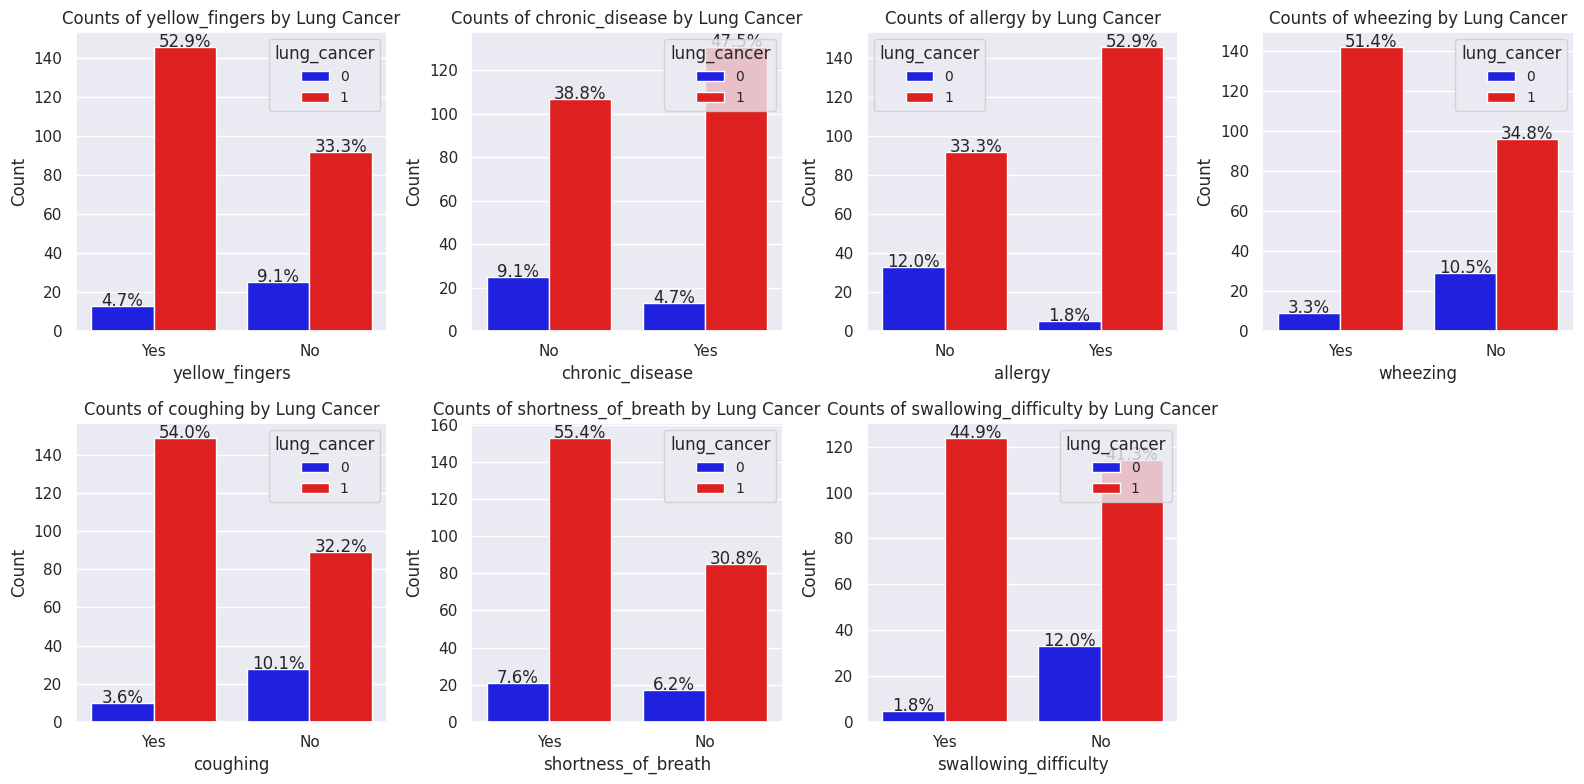

In [ ]:
df_hf_copy = df.copy()
health_factors = ['yellow_fingers', 'chronic_disease', 'allergy', 'wheezing', 'coughing', 'shortness_of_breath', 'swallowing_difficulty']

plt.figure(figsize=(16, 8))
for i, factor in enumerate(health_factors):
    plt.subplot(2, 4, i + 1)
    df_hf_copy[factor] = df_hf_copy[factor].map({0: 'No', 1: 'Yes'})
    palette = ['blue', 'red']
    ax = sns.countplot(data=df_hf_copy, x=factor, hue='lung_cancer', palette=palette)
    plt.title(f'Counts of {factor} by Lung Cancer')
    plt.xlabel(factor)
    plt.ylabel('Count')
    total_count = len(df_hf_copy)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height/total_count*100:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center')

sns.set(rc={'legend.fontsize': 10})
plt.tight_layout()
plt.show()


# Modeling

In [ ]:
X = df.drop('lung_cancer',axis=1)
y = df['lung_cancer']


In [ ]:
#Sử lý mất cân bằng dữ liệu
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
smote = SMOTE(sampling_strategy='minority')
X_resampled_over, Y_resampled_over = oversample.fit_resample(X, y)
X_resampled_smote, Y_resampled_smote = smote.fit_resample(X, y)
print("SMOTE:", Counter(Y_resampled_smote))

SMOTE: Counter({1: 238, 0: 238})


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X_resampled_smote, Y_resampled_smote, test_size=0.2, random_state=42)

# Logistic Regression

In [ ]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)
logistic_classification= classification_report(y_test, logistic_y_pred)
logistic_conf_matrix= confusion_matrix(y_test, logistic_y_pred)
print("Logistic Regression")
print("Classification Report:")
print(logistic_classification)
print("Confusion Matrix:")
print(logistic_conf_matrix)

Logistic Regression
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



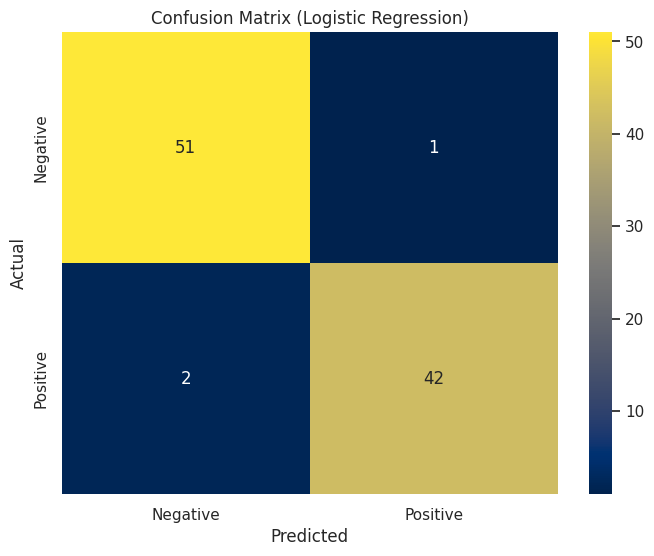

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_classification = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Random Forest")
print("Classification Report:")
print(rf_classification)
print("Confusion Matrix:")
print(rf_conf_matrix)


Random Forest
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        52
           1       0.98      0.95      0.97        44

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96

Confusion Matrix:
[[51  1]
 [ 2 42]]


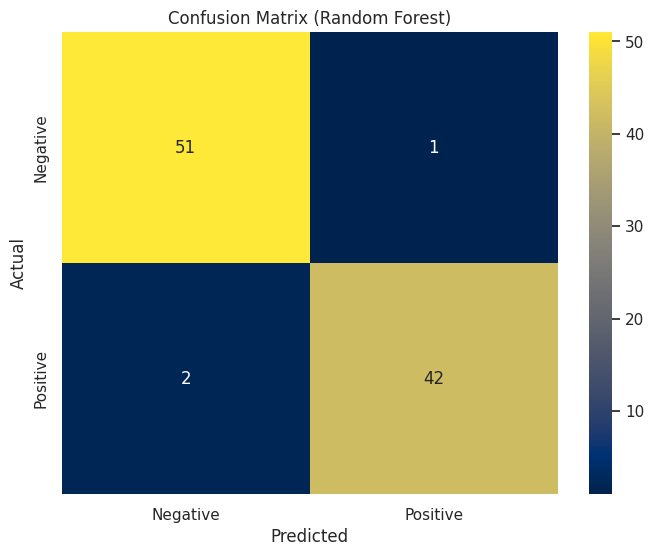

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Support Vector Machine (SVM)


In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model= SVC()
svm_model.fit(X_train, y_train)
svm_y_pred= svm_model.predict(X_test)
svm_classification= classification_report(y_test, svm_y_pred)
svm_conf_matrix= confusion_matrix(y_test, svm_y_pred)
print("Support Vector Machine (with Resampled Data)")
print("Classification Report:")
print(svm_classification)
print("Confusion Matrix:")
print(svm_conf_matrix)

Support Vector Machine (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66        52
           1       0.60      0.57      0.58        44

    accuracy                           0.62        96
   macro avg       0.62      0.62      0.62        96
weighted avg       0.62      0.62      0.62        96

Confusion Matrix:
[[35 17]
 [19 25]]


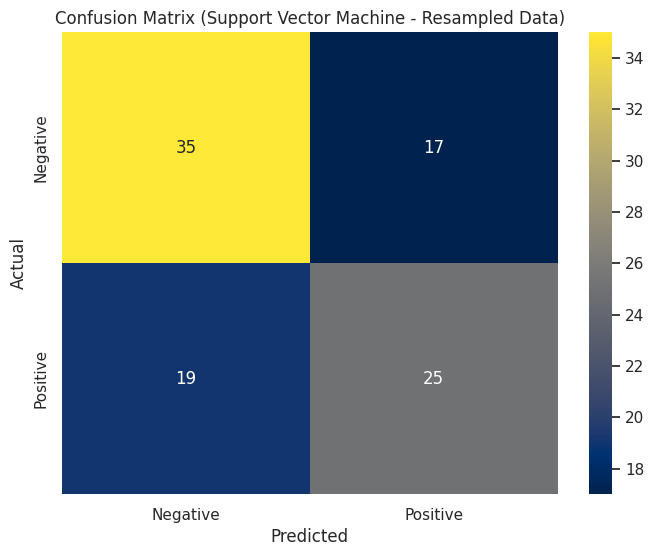

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Support Vector Machine - Resampled Data)')
plt.show()

# K-Nearest Neighbors (KNN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_y_pred= knn_model.predict(X_test)
knn_classification= classification_report(y_test, knn_y_pred)
knn_conf_matrix= confusion_matrix(y_test, knn_y_pred)
print("K-Nearest Neighbors (with Resampled Data)")
print("Classification Report:")
print(knn_classification)
print("Confusion Matrix:")
print(knn_conf_matrix)

K-Nearest Neighbors (with Resampled Data)
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        52
           1       0.93      0.93      0.93        44

    accuracy                           0.94        96
   macro avg       0.94      0.94      0.94        96
weighted avg       0.94      0.94      0.94        96

Confusion Matrix:
[[49  3]
 [ 3 41]]


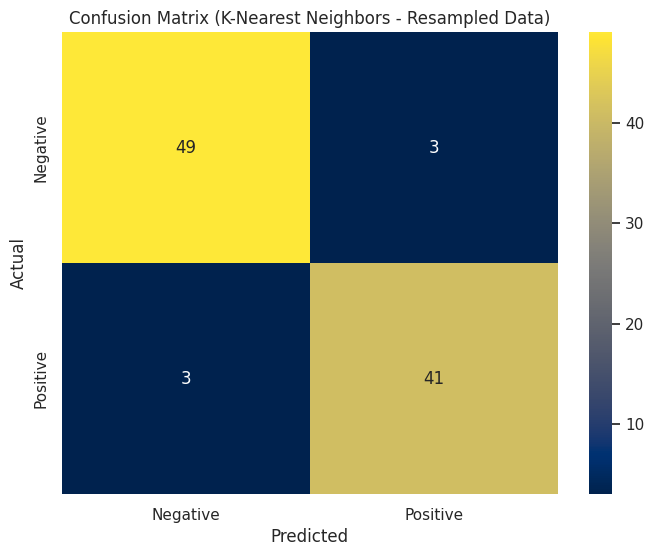

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="cividis",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (K-Nearest Neighbors - Resampled Data)')
plt.show()